# DATASET

The dataset is taken from one of the NASA Space Apps Challenge in 2018, “Spot that fire!”, under the section VOLCANOES, ICEBERGS, AND ASTEROIDS (OH MY).
The goal was using the dataset to develop a web-based or phone/tablet-based app that helps engage the public in wildfire prevention and early wildfire detection.
Here in my project I shall use the same dataset to develop a model that can recognize the images with fire.

Data was collected to train a model to distinguish between the images that contain fire (fire images) and regular images (non-fire images), so the whole problem was binary classification.
Data is divided into 2 folders, fire images folder contains 755 outdoor-fire images some of them contains heavy smoke, the other one is non-fire images which contain 244 nature images (eg: forest, tree, grass, river, people, foggy forest, lake, animal, road, and waterfall).
Data is skewed, which means the 2 classes (folders) don't have an equal number of samples, so make sure that you have a validation set with an equally-sized number of images per class (eg: 40 images of both fire and non-fire classes).

# METHODOLOGY
1. Data exploration & visualisation
1. Splitting of data
1. Deep Learning Model to Classify the Images
  * CNN
  * CNN with hyper parameter tuning
  * CNN with transferearning-VGG16

# DATA EXPLORATION & VISULISATION

In [ ]:
# import required basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# loading the dataset
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/My Drive/Imarticus Projects/Capstone Project 2/fire_dataset'

Mounted at /content/drive


In [ ]:
import os
cwd= os.getcwd()
print(cwd)

/content


In [ ]:
df = pd.DataFrame(columns=['path','label']) # creating empty dataframe

# making all fire images as 1
for dirname, _, filenames in os.walk('/content/drive/My Drive/Imarticus Projects/Capstone Project 2/fire_dataset/fire_images'):
  for filename in filenames:
    df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'fire']],columns=['path','label']))

# making all non-fire images as 0
for dirname, _, filenames in os.walk('/content/drive/My Drive/Imarticus Projects/Capstone Project 2/fire_dataset/non_fire_images'):
  for filename in filenames:
    df = df.append(pd.DataFrame([[os.path.join(dirname, filename),'non_fire']],columns=['path','label']))
    
df = df.sample(frac=1).reset_index(drop=True)
df.head(10)

,path,label
0,/content/drive/My Drive/Imarticus Projects/Cap...,fire
1,/content/drive/My Drive/Imarticus Projects/Cap...,fire
2,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
3,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
4,/content/drive/My Drive/Imarticus Projects/Cap...,fire
5,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
6,/content/drive/My Drive/Imarticus Projects/Cap...,fire
7,/content/drive/My Drive/Imarticus Projects/Cap...,fire
8,/content/drive/My Drive/Imarticus Projects/Cap...,fire
9,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire


In [ ]:
df.tail()

,path,label
994,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
995,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire
996,/content/drive/My Drive/Imarticus Projects/Cap...,fire
997,/content/drive/My Drive/Imarticus Projects/Cap...,fire
998,/content/drive/My Drive/Imarticus Projects/Cap...,fire


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = px.scatter(data_frame = df,x=df.index,y='label',color='label',title='Distribution of fire and non-fire images along the length of the dataframe')
fig.update_traces(marker_size=2)

In [ ]:
fig = make_subplots(rows=1, cols=2, specs=[[{"type": "xy"}, {"type": "pie"}]])

fig.add_trace(go.Bar(x =df['label'].value_counts().index,y=df['label'].value_counts().to_numpy(),marker_color=['rosybrown','lightgreen'],showlegend=False),row=1,col=1)

fig.add_trace(go.Pie(values=df['label'].value_counts().to_numpy(),labels=df['label'].value_counts().index,marker=dict(colors=['rosybrown','lightgreen'])),row=1, col=2)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

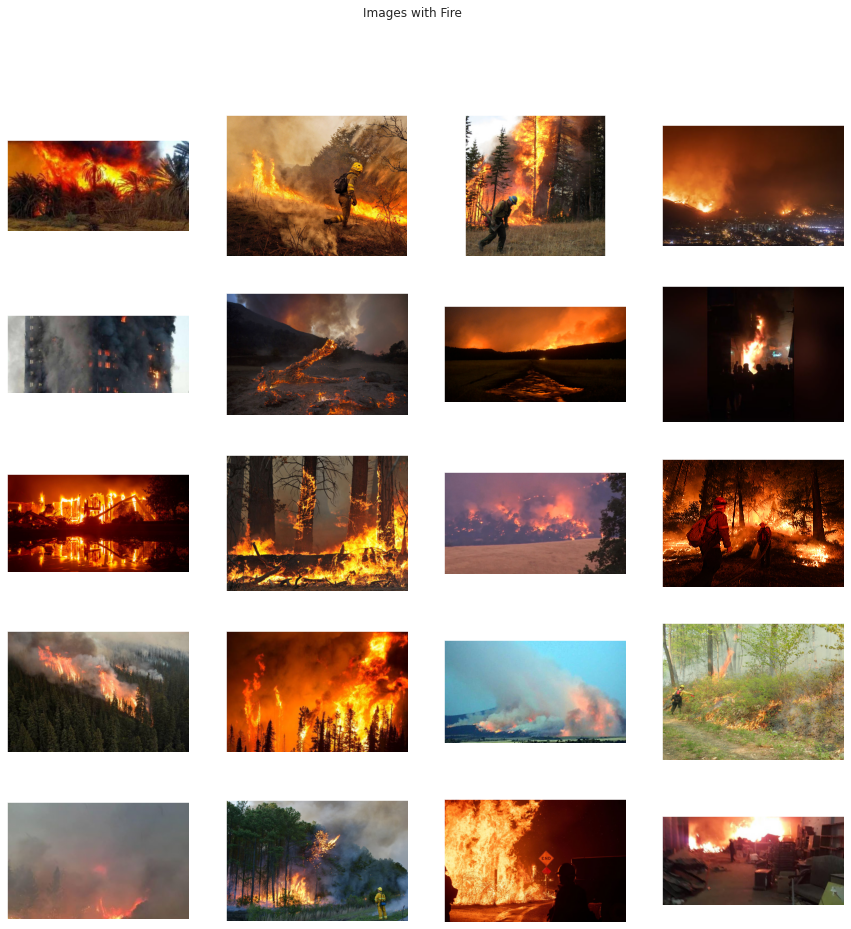

In [ ]:
label = 'fire' #label for images with fire
data = df[df['label'] == label]
sns.set_style('dark')

pics = 20 #set the number of pics
fig,ax = plt.subplots(int(pics//4),4,figsize=(15,15))
plt.suptitle('Images with Fire')
ax = ax.ravel()
for i in range((pics//4)*4):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

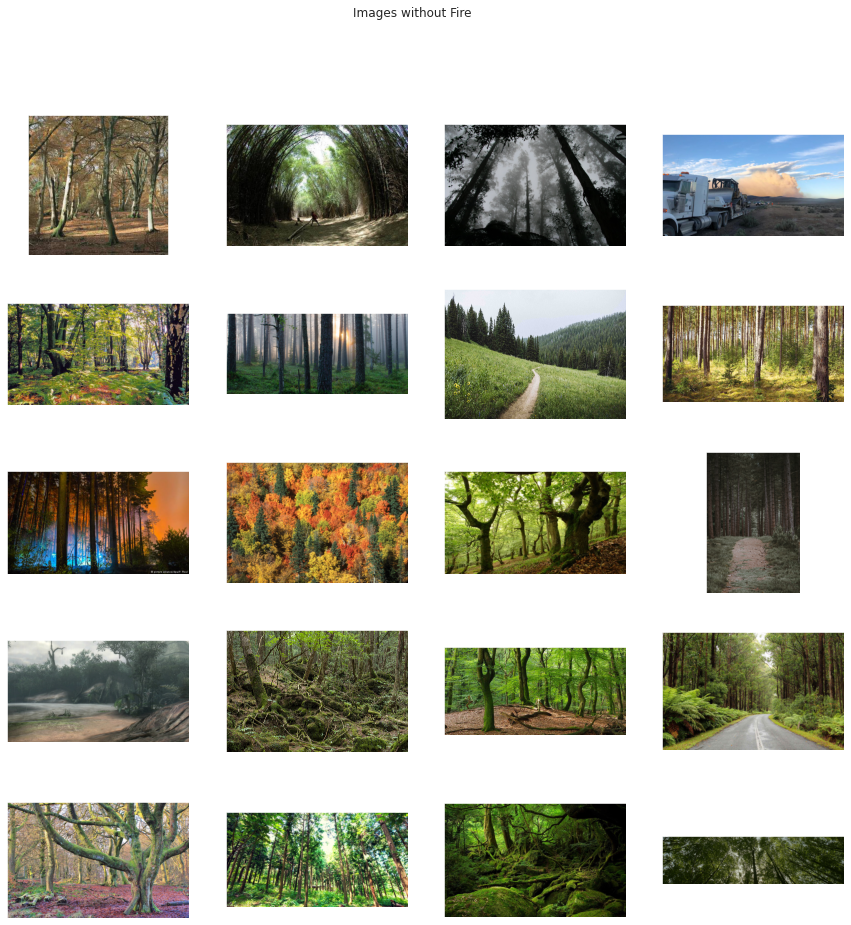

In [ ]:
label = 'non_fire' #label for images without fire
data = df[df['label'] == label]
sns.set_style('dark')

pics = 20 #set the number of pics
fig,ax = plt.subplots(int(pics//4),4,figsize=(15,15))
plt.suptitle('Images without Fire')
ax = ax.ravel()
for i in range((pics//4)*4):
    path = data.sample(1).loc[:,'path'].to_numpy()[0]
    img = image.load_img(path)
    img = image.img_to_array(img)/255
    ax[i].imshow(img)
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

Visualizing the size of pictures, since sizes vary as seen above.

In [ ]:
def shaper(row):
    shape = image.load_img(row['path']).size
    row['height'] = shape[1]
    row['width'] = shape[0]
    return row
df = df.apply(shaper,axis=1)
df.head(5)

,path,label,height,width
0,/content/drive/My Drive/Imarticus Projects/Cap...,fire,350,640
1,/content/drive/My Drive/Imarticus Projects/Cap...,fire,438,660
2,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire,794,1600
3,/content/drive/My Drive/Imarticus Projects/Cap...,non_fire,240,808
4,/content/drive/My Drive/Imarticus Projects/Cap...,fire,375,810


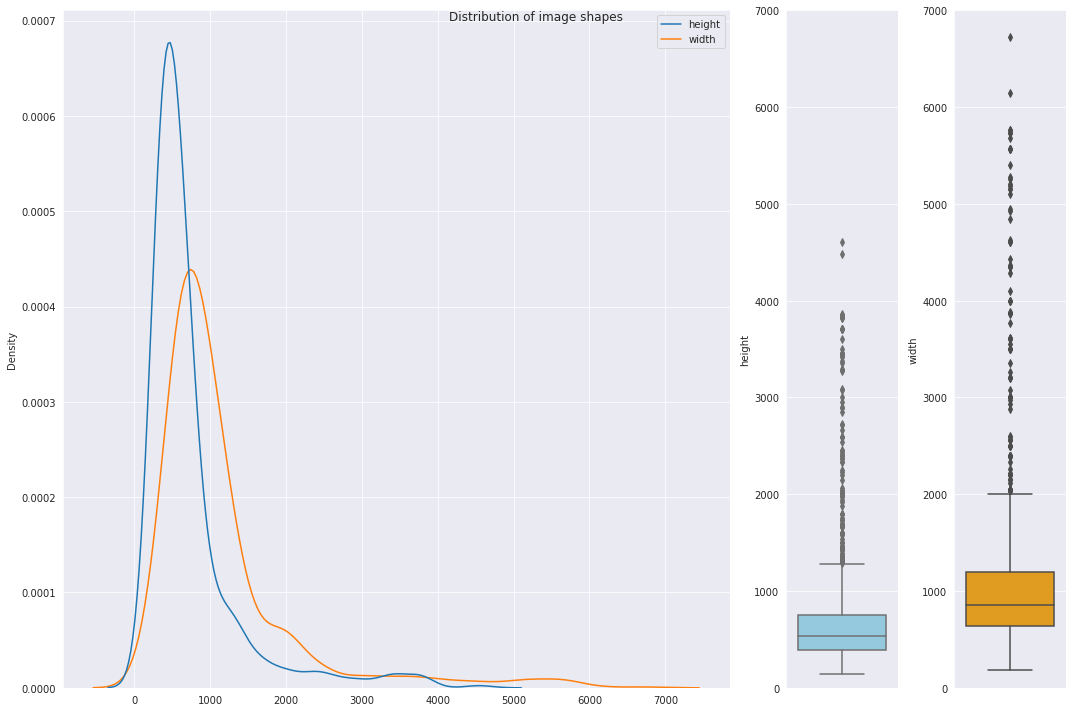

In [ ]:
sns.set_style('darkgrid')
fig,(ax1,ax2,ax3) = plt.subplots(1,3,gridspec_kw={'width_ratios': [3,0.5,0.5]},figsize=(15,10))
sns.kdeplot(data=df.drop(columns=['path','label']),ax=ax1,legend=True)
sns.boxplot(data=df,y='height',ax=ax2,color='skyblue')
sns.boxplot(data=df,y='width',ax=ax3,color='orange')
plt.suptitle('Distribution of image shapes')
ax3.set_ylim(0,7000)
ax2.set_ylim(0,7000)
plt.tight_layout()

Splitting the datatset into training, validation and testing datasets

In [ ]:
df_original = df.copy()

# Split into training, test and validation sets
val_index = int(df_original.shape[0]*0.1)

train_df = df_original.iloc[val_index:]

test_df = df_original.iloc[:val_index]

In [ ]:
# Display the shapes of the sets
train_df.shape, test_df.shape

((900, 4), (99, 4))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_generator = ImageDataGenerator(
    rotation_range= 20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range = 2,
    zoom_range=0.2,
    rescale = 1/255,
    validation_split=0.1,
)
test_generator=ImageDataGenerator()

In [ ]:
train_gen = train_generator.flow_from_dataframe(train_df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='training')
valid_gen = train_generator.flow_from_dataframe(train_df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary',subset='validation')
test_gen= test_generator.flow_from_dataframe(test_df,x_col='path',y_col='label',images_size=(256,256),class_mode='binary')

Found 810 validated image filenames belonging to 2 classes.
Found 90 validated image filenames belonging to 2 classes.
Found 99 validated image filenames belonging to 2 classes.


In [ ]:
type(train_gen)

keras.preprocessing.image.DataFrameIterator

In [ ]:
class_indices = {}
for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'fire', 1: 'non_fire'}


In [ ]:
class_indices = {}
for key in valid_gen.class_indices.keys():
    class_indices[valid_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'fire', 1: 'non_fire'}


In [ ]:
class_indices = {}
for key in test_gen.class_indices.keys():
    class_indices[test_gen.class_indices[key]] = key
    
print(class_indices)

{0: 'fire', 1: 'non_fire'}


So, we have 810 images in training set, 90 in validation set and 99 in testing set

# Model building using CNN (without pooling layer) with Keras tuner

In [ ]:
# importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten,Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.metrics import Recall,AUC

In [ ]:
!pip install keras-tuner

     |████████████████████████████████| 133 kB 9.7 MB/s 


In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(256,256,3)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(1, activation='sigmoid')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='binary_crossentropy',
              metrics=['accuracy',Recall(),AUC()])
  
  return model

In [ ]:
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output')

In [ ]:
tuner_search.search(train_gen, steps_per_epoch=100, epochs=10, validation_data=valid_gen)

Trial 5 Complete [00h 01m 24s]
val_accuracy: 0.8222222328186035

Best val_accuracy So Far: 0.8333333134651184
Total elapsed time: 00h 05m 41s
INFO:tensorflow:Oracle triggered exit


In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 252, 252, 32)      9248      
                                                                 
 flatten (Flatten)           (None, 2032128)           0         
                                                                 
 dense (Dense)               (None, 128)               260112512 
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 260,122,785
Trainable params: 260,122,785
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(train_gen, batch_size=32, epochs=50,validation_data=valid_gen)

Epoch 1/50
26/26 [==============================] - 41s 2s/step - loss: 0.2218 - accuracy: 0.8975 - recall: 0.9171 - auc: 0.9691 - val_loss: 0.1847 - val_accuracy: 0.9222 - val_recall: 0.9375 - val_auc: 0.9709
Epoch 2/50
26/26 [==============================] - 37s 1s/step - loss: 0.2173 - accuracy: 0.9160 - recall: 0.8537 - auc: 0.9651 - val_loss: 0.1628 - val_accuracy: 0.9111 - val_recall: 0.6875 - val_auc: 0.9759
Epoch 3/50
26/26 [==============================] - 41s 2s/step - loss: 0.1571 - accuracy: 0.9370 - recall: 0.9122 - auc: 0.9795 - val_loss: 0.1535 - val_accuracy: 0.8889 - val_recall: 0.5625 - val_auc: 0.9709
Epoch 4/50
26/26 [==============================] - 37s 1s/step - loss: 0.1539 - accuracy: 0.9444 - recall: 0.8829 - auc: 0.9814 - val_loss: 0.1600 - val_accuracy: 0.9222 - val_recall: 0.6875 - val_auc: 0.9789
Epoch 5/50
26/26 [==============================] - 38s 1s/step - loss: 0.1242 - accuracy: 0.9654 - recall: 0.9268 - auc: 0.9851 - val_loss: 0.1625 - val_accura

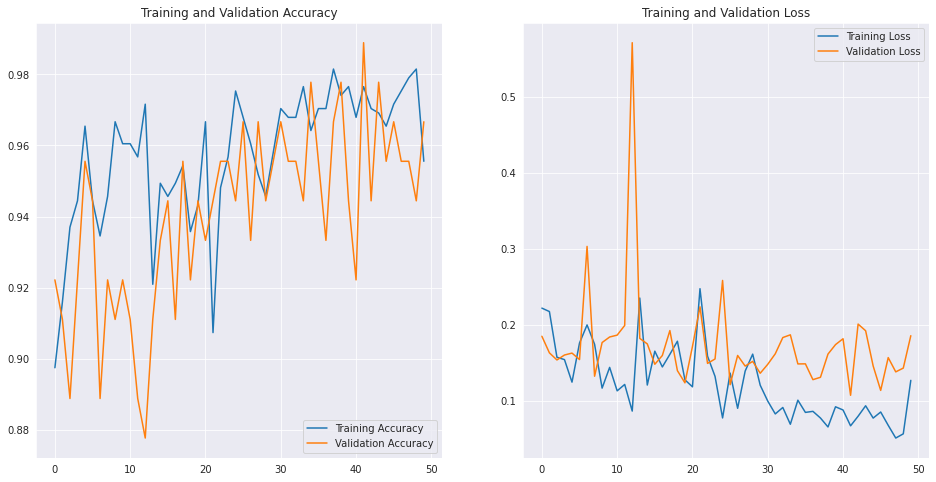

In [ ]:
epochs=50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epoch_range = range(epochs)

import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(epoch_range, acc, label='Training Accuracy')
plt.plot(epoch_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epoch_range, loss, label='Training Loss')
plt.plot(epoch_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.evaluate(test_gen)

4/4 [==============================] - 4s 876ms/step - loss: 30.5318 - accuracy: 0.9596 - recall: 0.8261 - auc: 0.9130


[30.531789779663086,
 0.9595959782600403,
 0.8260869383811951,
 0.9130434989929199]